In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transforms for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # CIFAR-10 images are 32x32
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load the CIFAR-10 dataset
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# DataLoader
batch_size = 128
train_loader = DataLoader(cifar10_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


In [3]:
import torch
from torch import nn, optim

class DAE(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder Layers
        self.fc1 = nn.Linear(32*32*3, 1024)
        self.fc2 = nn.Linear(1024, 768)
        self.fc3 = nn.Linear(768, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 64)
        
        # Decoder Layers
        self.fc7 = nn.Linear(64, 128)
        self.fc8 = nn.Linear(128, 256)
        self.fc9 = nn.Linear(256, 512)
        self.fc10 = nn.Linear(512, 768)
        self.fc11 = nn.Linear(768, 1024)
        self.fc12 = nn.Linear(1024, 32*32*3)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        h2 = self.relu(self.fc2(h1))
        h3 = self.relu(self.fc3(h2))
        h4 = self.relu(self.fc4(h3))
        h5 = self.relu(self.fc5(h4))
        return self.relu(self.fc6(h5))

    def decode(self, z):
        h7 = self.relu(self.fc7(z))
        h8 = self.relu(self.fc8(h7))
        h9 = self.relu(self.fc9(h8))
        h10 = self.relu(self.fc10(h9))
        h11 = self.relu(self.fc11(h10))
        return self.sigmoid(self.fc12(h11))

    def forward(self, x):
        q = self.encode(x.view(-1, 32*32*3))
        return self.decode(q)


In [5]:
# Model, optimizer, and criterion
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = DAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# Training function
def train(epoch, model, train_loader, optimizer, criterion, device='cpu'):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        # Add Gaussian noise
        data_noise = torch.randn(data.shape).to(device)
        data_noise = data + data_noise

        # Forward pass
        recon_batch = model(data_noise)
        loss = criterion(recon_batch, data.view(data.size(0), -1).to(device))
        loss.backward()

        # Update weights
        train_loss += loss.item() * len(data)
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

# Train the model
epochs = 10
for epoch in range(1, epochs + 1):
    train(epoch, model, train_loader, optimizer, criterion, device)


Train Epoch: 1 [0/50000 (0%)]	Loss: 0.542706
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.231107
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.224221
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.228534
====> Epoch: 1 Average loss: 0.2232
Train Epoch: 2 [0/50000 (0%)]	Loss: 0.202777
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.218385
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.203302
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.208074
====> Epoch: 2 Average loss: 0.2075
Train Epoch: 3 [0/50000 (0%)]	Loss: 0.211274
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.195126
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.206833
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.210480
====> Epoch: 3 Average loss: 0.2034
Train Epoch: 4 [0/50000 (0%)]	Loss: 0.193086
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.215609
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.198971
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.196727
====> Epoch: 4 Average loss: 0.1978
Train Epoch: 5 [0/50000 (0%)]	Loss: 0.192970
Train Epoch: 5 [12800/50000 (26

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 Image 0 with label 0               Image 1 with label 7               Image 2 with label 4               Image 3 with label 5              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 Image 4 with label 1              

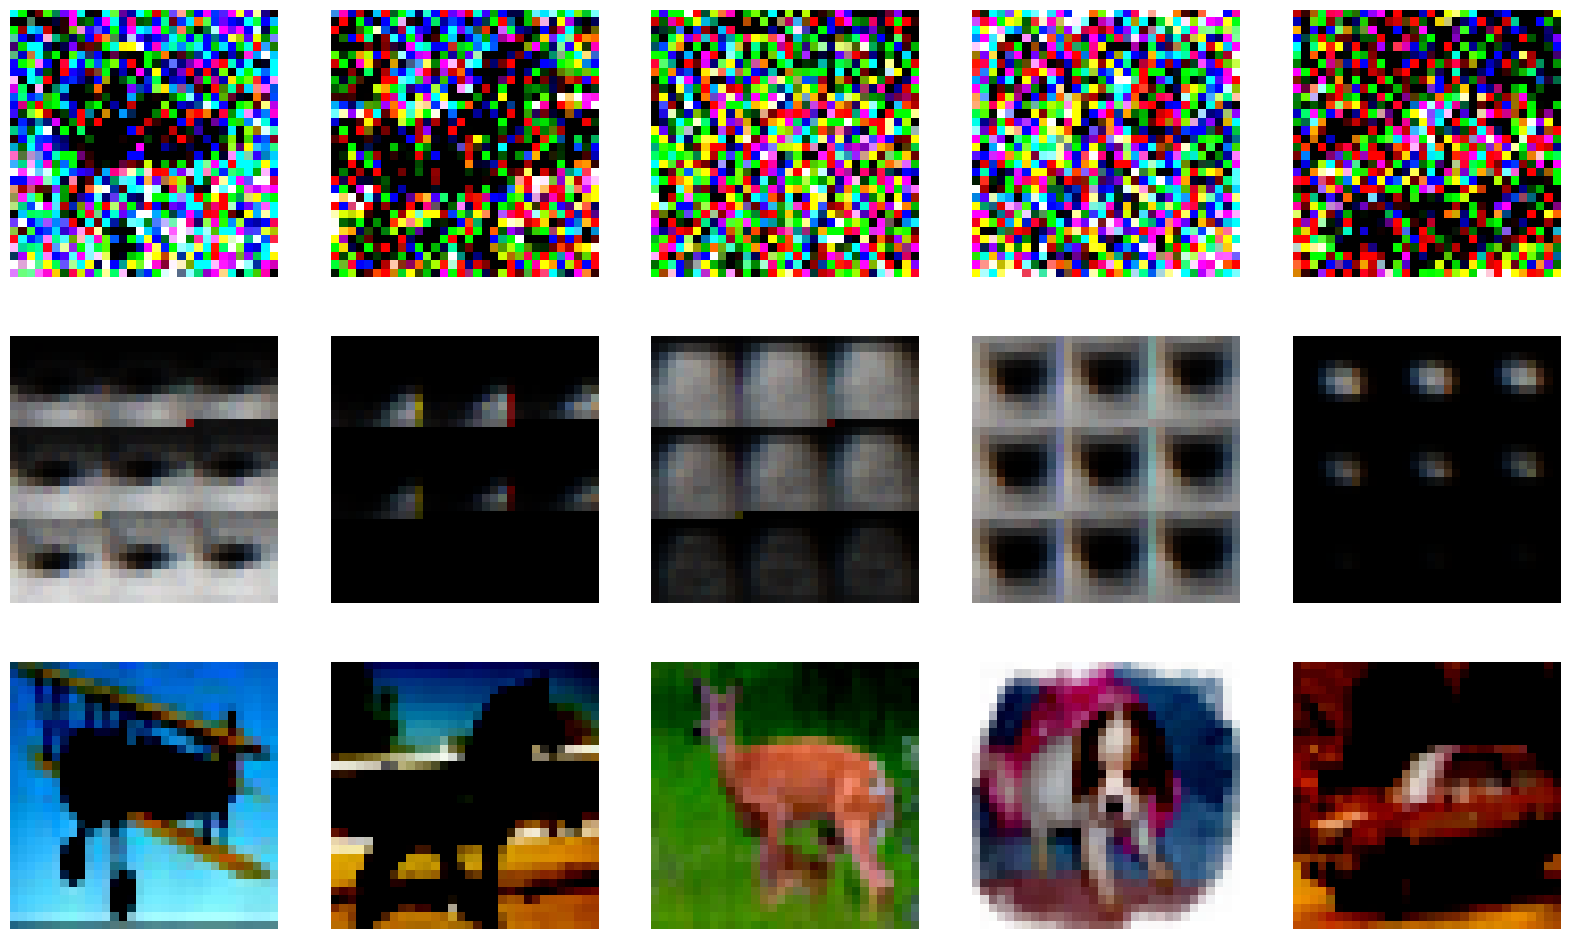

In [9]:
test_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=5, shuffle=True)

import matplotlib.pyplot as plt
for batch_idx, (data, labels) in enumerate(test_loader):
    data = data.to(device)
    optimizer.zero_grad()
 
    data_noise = torch.randn(data.shape).to(device)
    data_noise = data + data_noise
 
    recon_batch = model(data_noise.to(device))
    break
 
plt.figure(figsize=(20, 12))
for i in range(5):
    print(f" Image {i} with label {labels[i]}              ", end="")
    plt.subplot(3, 5, 1+i)
    plt.imshow(data_noise[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='binary')
    plt.axis('off')
    plt.subplot(3, 5, 6+i)
    plt.imshow(recon_batch[i].view(32, 32, 3).detach().cpu().numpy(), cmap='binary')
    plt.axis('off')
    plt.subplot(3, 5, 11+i)
    plt.imshow(data[i].permute(1, 2, 0).detach().cpu().numpy(), cmap='binary')
    plt.axis('off')
plt.show()